# CS-UY4536 Final Project: Predicting SP500 Monthly Price Shifts
Done by Matthew Swartz and Sasha Agapiev for 12/8/21
---



# Importing Libraries

In [42]:
import numpy as np
import pandas as pd

# Import Logistic Regression libraries
import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

# Import plotting libraries 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [11]:
names =[
    'DATE', 'PRICE', 'DIVIDEND', 'EARNINGS', 'CPI', 'LIR', 
    'RP',  'RD', 'RE', 'PE10', 'MPC'
]

# read in our S&P data
df = pd.read_csv('data_csv.csv', header=0, names=names, na_values='?')
# remove na values
df = df.dropna()
# encode monthly percent change where positive month = 1, negative month = 0
df['MPC'] = np.where((df.MPC)>=0,1,0)


# checking data
df.head(6)
# print(df.shape)
# num_samples = df.shape[0]
# num_attributes = df.shape[1]
# print(num_samples, num_attributes)

,DATE,PRICE,DIVIDEND,EARNINGS,CPI,LIR,RP,RD,RE,PE10,MPC
0,1/1/90,339.97,11.14,22.49,127.4,8.21,666.69,21.85,44.10,17.05,0
1,2/1/90,330.45,11.23,22.08,128.0,8.47,644.99,21.92,43.10,16.51,1
2,3/1/90,338.46,11.32,21.67,128.7,8.59,657.03,21.97,42.07,16.83,0
3,4/1/90,338.18,11.44,21.53,128.9,8.79,655.46,22.17,41.74,16.81,1
4,5/1/90,350.25,11.55,21.40,129.2,8.76,677.28,22.34,41.38,17.39,1
5,6/1/90,360.39,11.66,21.26,129.9,8.48,693.13,22.43,40.89,17.82,0


# UNSUPERVISED ANALYSIS




In [12]:
# Using the df.corr, df.describe methods from pandas to help get a better sense of our data
print(df.corr())
df.describe()

             PRICE  DIVIDEND  EARNINGS  ...        RE      PE10       MPC
PRICE     1.000000  0.901687  0.874795  ...  0.815520  0.407127  0.023046
DIVIDEND  0.901687  1.000000  0.839127  ...  0.722634  0.019248  0.064273
EARNINGS  0.874795  0.839127  1.000000  ...  0.975094  0.175341  0.099684
CPI       0.866594  0.905851  0.852571  ...  0.738334  0.003797  0.059620
LIR      -0.790626 -0.825611 -0.755927  ... -0.631736 -0.003545 -0.058998
RP        0.953333  0.742372  0.768547  ...  0.756740  0.658893 -0.012438
RD        0.874325  0.986624  0.795626  ...  0.687959  0.036933  0.060202
RE        0.815520  0.722634  0.975094  ...  1.000000  0.287897  0.105928
PE10      0.407127  0.019248  0.175341  ...  0.287897  1.000000 -0.071317
MPC       0.023046  0.064273  0.099684  ...  0.105928 -0.071317  1.000000

[10 rows x 10 columns]


,PRICE,DIVIDEND,EARNINGS,CPI,LIR,RP,RD,RE,PE10,MPC
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,1155.960655,22.330327,53.699196,189.273482,4.650923,1459.163601,28.270804,67.258601,25.511488,0.630952
std,544.017981,10.223598,28.708202,35.460967,1.913400,500.571075,7.784400,26.267634,6.530115,0.483267
min,307.120000,11.140000,6.860000,127.400000,1.500000,574.750000,21.500000,8.060000,13.320000,0.000000
25%,753.660000,14.937500,28.830000,158.975000,2.892500,1053.802500,22.320000,42.960000,20.852500,0.000000
50%,1160.505000,17.495000,47.360000,185.200000,4.570000,1491.005000,24.755000,63.730000,24.910000,1.000000
75%,1409.317500,27.520000,82.862500,220.025000,6.042500,1788.047500,31.770000,92.277500,27.412500,1.000000
max,2664.340000,48.930000,109.880000,246.820000,8.890000,2700.130000,49.590000,111.360000,44.200000,1.000000


# SUPERVISED ANALYSIS PART 1: Logistic Regression

In [13]:
# Editing dataframe to get our feature and target array 

# Convert the df data frame into a numpy array named df2
df2 = df.to_numpy()
# Select all rows and first 9 columns as X from df2
X = df2[:, 1:10]
# Select all rows and monthly percent change column as target
Y = df2[:, 10:]
# added to flatten y as I was getting an error message
Y = np.ravel(Y)
Y = Y.astype('int')

In [14]:
# Using built-in preprocessing function to scale the X data 
X_scale = preprocessing.scale(X)

In [15]:
# Splitting the dataset into training and test data
# 336 training examples, and we decided on a 75/25 split for training and testing
X_train = X_scale[:252]
Y_train = Y[:252]
X_test = X_scale[252:]
Y_test = Y[252:]


In [16]:
# Standard Logistic Regression 

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'iter'.
iteration_values = []

# This function creates a standard logreg model using sklearn's linear_model module
# The code in standard_logreg_model is inspired by code from previous homework assignments
# It takes, as arguments: iter(desired number of max_iterations), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def standard_logreg_model(iter , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with no penalty 
    # NOTE: Since there's no regularization in the standard logistic regression, the c values are insignificant
    logreg = linear_model.LogisticRegression(penalty='none', solver='saga', max_iter=iter)
    
    # Fit the model on the training set
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    iteration_values.append(iter)


In [17]:
# running our Standard Logistic Regression with various iterations
iters = [100, 500, 1000, 10000, 25000, 50000]

# re-initialize the Regressionlists to clear old data
acc_train_logreg = [] 
acc_test_logreg = []
iteration_values = []

for iter in iters:
    standard_logreg_model(iter, X_train, Y_train, X_test, Y_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy on training data = 0.642857
Accuracy on test data = 0.452381
Accuracy on training data = 0.650794
Accuracy on test data = 0.404762
Accuracy on training data = 0.666667
Accuracy on test data = 0.392857
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143
Accuracy on training data = 0.654762
Accuracy on test data = 0.357143


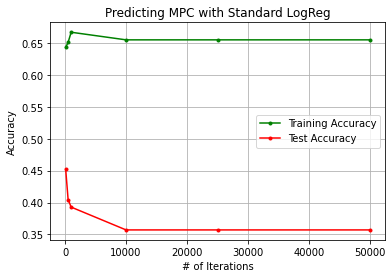

In [18]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(iteration_values, acc_train_logreg, '.-', color='green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(iteration_values, acc_test_logreg, '.-', color='red')

plt.xlabel('# of Iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with Standard LogReg')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)

# Logistic Regression with L1 Regularization

In [19]:
# 
# Logistic Regression using Lasso (L1) Regularization
# 

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

# This function creates an L1 logreg model using sklearn's linear_model module
# The code in logreg_model is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with L1 Regularization
    logreg = linear_model.LogisticRegression(penalty='l1',C=c,solver='saga',max_iter=10000)
    
    # Fit the model on the training set
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)


In [20]:
# running our L1 regularization with various c values
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# re-initialize the lists to clear old data
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)



Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.619048
Accuracy on test data = 0.595238
Accuracy on training data = 0.638889
Accuracy on test data = 0.452381


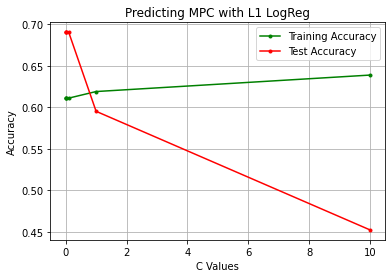

In [21]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, '.-', color='green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_test_logreg, '.-', color='red')

plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L1 LogReg')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)



# Logistic Regression with L2 Regularization



In [22]:
# 
# Logistic Regression using Ridge (L2) Regularization
#

# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

# This function creates an L2 logreg model using sklearn's linear_model module
# The code in logreg2_model is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization), X_train (training data features), Y_train (training data targets)
#     X_test (testing data features), Y_test (testing data targets)
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create the Logistic Regression model object with L2 Regularization
    logreg2 = linear_model.LogisticRegression(penalty='l2',C=c,solver='saga',max_iter=10000)
    
    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)
    

In [23]:
# running our L2 regularization with various c values
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# re-initialize the lists to clear old data
acc_train_logreg2 = [] 
acc_test_logreg2 = []
c_logreg2 = []

for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)


Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.599206
Accuracy on test data = 0.583333
Accuracy on training data = 0.626984
Accuracy on test data = 0.547619
Accuracy on training data = 0.638889
Accuracy on test data = 0.476190


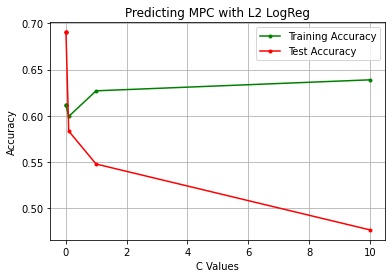

In [24]:
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_test_logreg2, '.-', color = 'red')

plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L2 LogReg')

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)



# Logistic Regression Using Polynomial Feature Transformation


In [25]:
# 
# Logistic Regression with a Polynomial Feature Transformation
#

# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.619048
Accuracy on test data = 0.690476
Accuracy on training data = 0.674603
Accuracy on test data = 0.380952
Accuracy on training data = 0.670635
Accuracy on test data = 0.559524


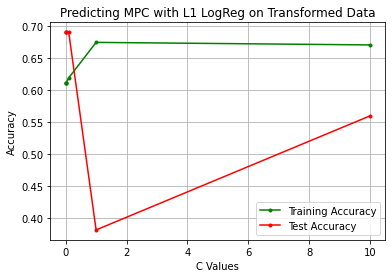

In [35]:
# L1 Regularization with Polynomial Feature Transform
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Running the L1 logreg model function with the transformed data
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_test_logreg, '.-', color = 'red')
# Use the code that you wrote to draw the plot for logreg_model()
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L1 LogReg on Transformed Data')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)


Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.611111
Accuracy on test data = 0.690476
Accuracy on training data = 0.615079
Accuracy on test data = 0.690476
Accuracy on training data = 0.662698
Accuracy on test data = 0.369048
Accuracy on training data = 0.678571
Accuracy on test data = 0.404762
Accuracy on training data = 0.686508
Accuracy on test data = 0.654762


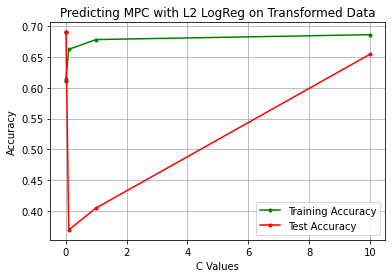

In [36]:
# L2 Regularization with Polynomial Feature Transform
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# Running the L2 logreg function with the transformed data
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, '.-', color = 'green')
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_test_logreg2, '.-', color = 'red')
# Use the code that you wrote to draw the plot for logreg_model()
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Predicting MPC with L2 LogReg on Transformed Data')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')
plt.show(block = False)

# SUPERVISED ANALYSIS PART 2: Support Vector Machines

# SVM With Linear Kernel 

In [28]:
# We are using sklearn's built-in SVM tool to create our SVM models
from sklearn import svm
# Initialize an empty list to store values of training set accuracy
acc_train_svm_linear = [] 
# Initialize an empty list to store values of test set accuracy
acc_test_svm_linear = []
# Initialize an empty list to store different values of parameter 'c'.
c_svm_linear = []

# This function creates a linear SVM model using sklearn's SVM module
# The code in svm_linear is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_linear(c):
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)

    svc_linear.fit(X_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.666667
Train Accuracy = 0.646825
Test Accuracy = 0.511905


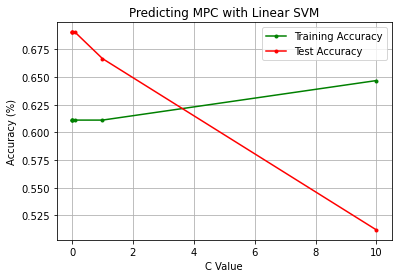

In [29]:
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

# Running the linear SVM function with various c values
for c in cVals:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear, '.-', color = 'green')
plt.plot(c_svm_linear, acc_test_svm_linear, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Linear SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# SVM With Radial Basis Function (RBF) Kernel

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.674603
Test Accuracy = 0.690476
Train Accuracy = 0.678571
Test Accuracy = 0.654762


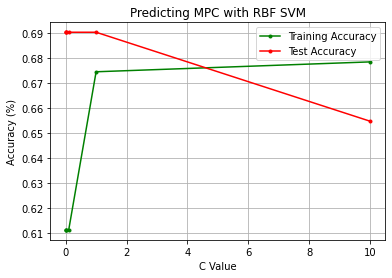

In [31]:
# Initialize an empty list to store values of training set accuracy
acc_train_svm_rbf = []
# Initialize an empty list to store values of test set accuracy
acc_test_svm_rbf = []
# Initialize an empty list to store different values of parameter 'c'
c_svm_rbf = []

# This function creates an RBF SVM model using sklearn's SVM module
# The code in svm_rbf is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_rbf(c):
    svc_rbf = svm.SVC(probability=False, kernel='rbf', C=c)
      
    svc_rbf.fit(X_train, Y_train)

    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_rbf_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_rbf_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)
  
# Running svm_rbf with various c values
for c in cVals:
    svm_rbf(c)

# Plotting the accuracies vs the various c values
plt.plot(c_svm_rbf, acc_train_svm_rbf, '.-', color = 'green')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with RBF SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()


# SVM with Polynomial Kernel

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.626984
Test Accuracy = 0.690476
Train Accuracy = 0.634921
Test Accuracy = 0.690476
Train Accuracy = 0.682540
Test Accuracy = 0.535714
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.626984
Test Accuracy = 0.690476
Train Accuracy = 0.634921
Test Accuracy = 0.690476
Train Accuracy = 0.682540
Test Accuracy = 0.535714


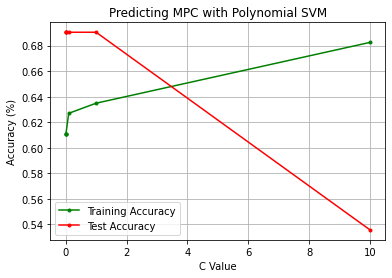

In [32]:
# Initialize an empty list to store values of training set accuracy
acc_train_svm_poly = []
# Initialize an empty list to store values of test set accuracy
acc_test_svm_poly = []
# Initialize an empty list to store different values of parameter 'c'
c_svm_poly = []

# This function creates a Polynomial SVM model using sklearn's SVM module
# The code in svm_polynomial is inspired by code from previous homework assignments
# It takes, as arguments: c(desired c value for regularization)
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability=False, kernel='poly', C=c)
    
    svc_polynomial.fit(X_train, Y_train)

    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
  
# Running svm_polynomial with various c values
for c in cVals:
    svm_polynomial(c)

# Re-initializing the lists to clear old data 
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
for c in cVals:
    svm_polynomial(c)
plt.plot(c_svm_poly, acc_train_svm_poly, '.-', color = 'green')
plt.plot(c_svm_poly, acc_test_svm_poly, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Polynomial SVM")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# SVM With Linear Kernel on Polynomial Transformed Data

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.623016
Test Accuracy = 0.690476
Train Accuracy = 0.682540
Test Accuracy = 0.357143
Train Accuracy = 0.678571
Test Accuracy = 0.357143
Train Accuracy = 0.678571
Test Accuracy = 0.535714


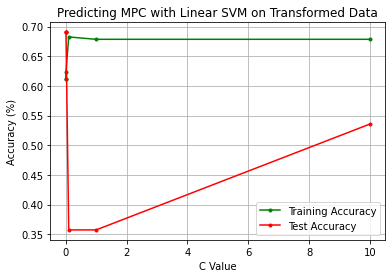

In [37]:
def svm_linear(c):
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)

    svc_linear.fit(X_transformed_train, Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_transformed_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_linear_test = svc_linear.predict(X_transformed_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_linear.append(c)
  
acc_train_svm_linear = []
acc_test_svm_linear = []
c_svm_linear = []

# Running the linear SVM function with various c values
for c in cVals:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear, '.-', color = 'green')
plt.plot(c_svm_linear, acc_test_svm_linear, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Linear SVM on Transformed Data")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# SVM With RBF Kernel on Polynomial Transformed Data



Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.642857
Test Accuracy = 0.690476
Train Accuracy = 0.690476
Test Accuracy = 0.654762


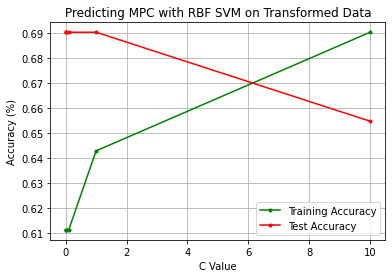

In [39]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability=False, kernel='rbf', C=c)
      
    svc_rbf.fit(X_transformed_train, Y_train)

    Yhat_svc_rbf_train = svc_rbf.predict(X_transformed_train)
    acc_train = np.mean(Yhat_svc_rbf_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_transformed_test)
    acc_test = np.mean(Yhat_svc_rbf_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)

acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

# Running svm_rbf with various c values
for c in cVals:
    svm_rbf(c)


# Plotting the accuracies vs the various c values
plt.plot(c_svm_rbf, acc_train_svm_rbf, '.-', color = 'green')
plt.plot(c_svm_rbf, acc_test_svm_rbf, '.-', color = 'red')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with RBF SVM on Transformed Data")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()


# SVM With Polynomial Kernel on Polynomial Transformed Data

Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.615079
Test Accuracy = 0.690476
Train Accuracy = 0.650794
Test Accuracy = 0.500000
Train Accuracy = 0.658730
Test Accuracy = 0.547619
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.611111
Test Accuracy = 0.690476
Train Accuracy = 0.615079
Test Accuracy = 0.690476
Train Accuracy = 0.650794
Test Accuracy = 0.500000
Train Accuracy = 0.658730
Test Accuracy = 0.547619


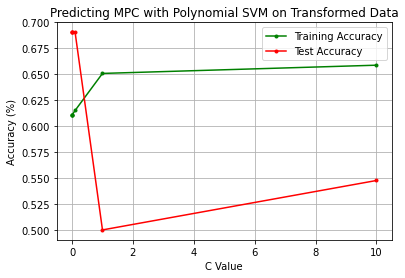

In [40]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability=False, kernel='poly', C=c)
    
    svc_polynomial.fit(X_transformed_train, Y_train)

    Yhat_svc_poly_train = svc_polynomial.predict(X_transformed_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(X_transformed_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
  
# Running svm_polynomial with various c values
for c in cVals:
    svm_polynomial(c)

# Re-initializing the lists to clear old data 
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
for c in cVals:
    svm_polynomial(c)
plt.plot(c_svm_poly, acc_train_svm_poly, '.-', color = 'green')
plt.plot(c_svm_poly, acc_test_svm_poly, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Polynomial SVM on Transformed Data")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# SUPERVISED ANALYSIS PART 3: Neural Networks

# Neural Network with Sigmoid Activation Function

In [56]:
from sklearn.preprocessing import StandardScaler # we're using the built-in sklearn scaler for our data
import numpy.random as r                         # some more useful imports
from sklearn.metrics import accuracy_score

# modifying our data for the neural network
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
# split up our data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [44]:
# function for setting up output layer, need 2 output neurons as y is either 0 or 1
# we decided with this for our final approach because it yielded better results than when using one output layer
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect
# converting to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [47]:
# function to calculate our sigmoid value
def f(z):
    return 1 / (1 + np.exp(-z))
# function to calculate our sigmoid value
def f_deriv(z):
    return f(z) * (1 - f(z))



In [48]:
# function to setup and initialize W and b
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b
# function to setup W_step and b_step
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b
# function to calculate our feed forward of NN
def feed_forward(x, W, b):
    a = {1: x} 
    z = { }
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z
# function to calculate our delta for each node in the outer layer
def calculate_out_layer_delta(y, a_out, z_out):
    return -(y-a_out) * f_deriv(z_out) 
# function to calculate our delta for each node in the hidden layer
def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [49]:
def train_nn(c, nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    #lambd = lambda regularization parameter for regularized cost function -- if no regularization, set lambd = 0
    lambd = 1/c
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l] + lambd * W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Starting gradient descent for 1000 iterations
Iteration 0 of 1000


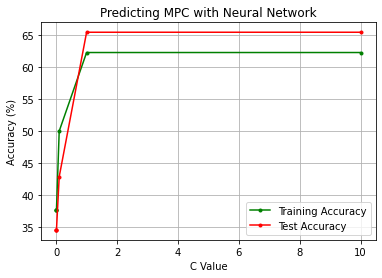

In [57]:
nn_structure = [9, 10, 2] # To change the number of hidden layers, change the value of nn_structure[1]
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
# train the NN
for c in cVals:
  W, b, avg_cost_func = train_nn(c, nn_structure, X_train, y_v_train, 1000)
  y_pred_train = predict_y(W, b, X_train, 3)
  y_pred_test = predict_y(W, b, X_test, 3)
  train_accuracies.append((accuracy_score(y_train, y_pred_train) * 100))
  test_accuracies.append((accuracy_score(y_test, y_pred_test) * 100))

plt.plot(cVals, train_accuracies, '.-', color = 'green')
plt.plot(cVals, test_accuracies, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Neural Network")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()



# Neural Network with Sigmoid Activation Function on Polynomial Transformed Data

Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in multiply


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Starting gradient descent for 1000 iterations
Iteration 0 of 1000


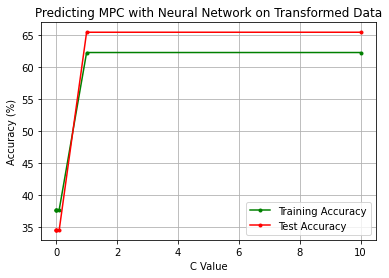

In [62]:
i, inputlayer = X_transformed_train.shape
nn_structure = [inputlayer, 10, 2] # To change the number of hidden layers, change the value of nn_structure[1]
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
# train the NN
for c in cVals:
  W, b, avg_cost_func = train_nn(c, nn_structure, X_transformed_train, y_v_train, 1000)
  y_pred_train = predict_y(W, b, X_transformed_train, 3)
  y_pred_test = predict_y(W, b, X_transformed_test, 3)
  train_accuracies.append((accuracy_score(y_train, y_pred_train) * 100))
  test_accuracies.append((accuracy_score(y_test, y_pred_test) * 100))

plt.plot(cVals, train_accuracies, '.-', color = 'green')
plt.plot(cVals, test_accuracies, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with Neural Network on Transformed Data")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# Neural Network with TanH Activation Function



In [63]:
# function to calculate our tanh value
def f_tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
# function to calculate our tanh derivative value
def f_tanh_deriv(z):
    return 1 - (f(z) ** 2)

In [64]:
# function to calculate our feed forward of NN with tanh
def feed_forward_tanh(x, W, b):
    a = {1: x} 
    z = { }
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f_tanh(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z
# function to calculate our delta for each node in the outer layer
def calculate_out_layer_delta_tanh(y, a_out, z_out):
    return -(y-a_out) * f_tanh_deriv(z_out) 
# function to calculate our delta for each node in the hidden layer
def calculate_hidden_delta_tanh(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_tanh_deriv(z_l)


In [65]:
# function for back propigating and training our NN
def train_nn_tanh(c, nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    #lambd = lambda regularization parameter for regularized cost function -- if no regularization, set lambd = 0
    lambd = 1/c
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward_tanh(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta_tanh(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta_tanh(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l] + lambd * W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func
# running our NN
def predict_y_tanh(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward_tanh(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Starting gradient descent for 1000 iterations
Iteration 0 of 1000


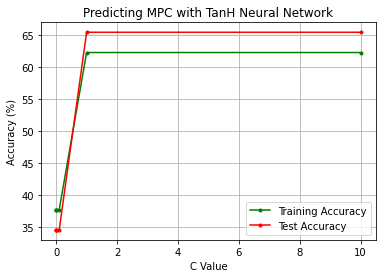

In [66]:
nn_structure = [9, 10, 2] # To change the number of hidden layers, change the value of nn_structure[1]
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
# train the NN
for c in cVals:
  W, b, avg_cost_func = train_nn_tanh(c, nn_structure, X_train, y_v_train, 1000)
  y_pred_train = predict_y_tanh(W, b, X_train, 3)
  y_pred_test = predict_y_tanh(W, b, X_test, 3)
  train_accuracies.append((accuracy_score(y_train, y_pred_train) * 100))
  test_accuracies.append((accuracy_score(y_test, y_pred_test) * 100))

plt.plot(cVals, train_accuracies, '.-', color = 'green')
plt.plot(cVals, test_accuracies, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with TanH Neural Network")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# Neural Network with TanH Activation Function on Polynomial Transformed Data


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Starting gradient descent for 1000 iterations
Iteration 0 of 1000


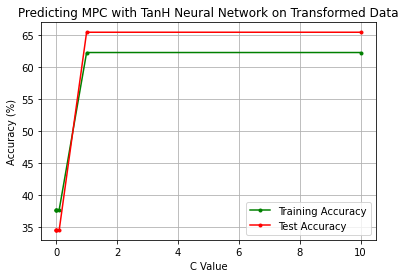

In [67]:
i, inputlayer = X_transformed_train.shape
nn_structure = [inputlayer, 10, 2] # To change the number of hidden layers, change the value of nn_structure[1]
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
# train the NN
for c in cVals:
  W, b, avg_cost_func = train_nn_tanh(c, nn_structure, X_transformed_train, y_v_train, 1000)
  y_pred_train = predict_y_tanh(W, b, X_transformed_train, 3)
  y_pred_test = predict_y_tanh(W, b, X_transformed_test, 3)
  train_accuracies.append((accuracy_score(y_train, y_pred_train) * 100))
  test_accuracies.append((accuracy_score(y_test, y_pred_test) * 100))

plt.plot(cVals, train_accuracies, '.-', color = 'green')
plt.plot(cVals, test_accuracies, '.-', color = 'red')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Predicting MPC with TanH Neural Network on Transformed Data")
plt.xlabel("C Value")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

[37.698412698412696, 37.698412698412696, 37.698412698412696, 37.698412698412696, 62.301587301587304, 62.301587301587304]
[34.523809523809526, 34.523809523809526, 34.523809523809526, 34.523809523809526, 65.47619047619048, 65.47619047619048]
